# 통계
* 통계는 데이터를 이해하는 바탕이 되는 수리적 기법
* 여기서는 맛만 보는 수준으로 다룬다
> 통계학은 자료를 정보화하고 이를 바탕으로 하여 객관적인 의사 결정 과정을 연구하는 학문

## 목차
* 5.1 데이터셋 설명하기
    * [5.1.1 중심 경향성(central tendency)](#5.1.1-중심-경향성(central-tendency))
        * 평균/중앙값/분위/최빈값
    * [5.1.2 산포도(dispersion)](#5.1.2-산포도(dispersion))
        * 범위/ 분산/ 표준편차
* [5.2 상관관계](#5.2-상관관계)
    * 공분산/ 상관관계
* [5.3 심슨의 역설 (Simpson's paradox)](#5.3-심슨의-역설-(Simpson's-paradox))
* [5.4 상관관계에 대한 추가적인 경고 사항](#5.4-상관관계에-대한-추가적인-경고-사항)
* [5.5 상관관계와 인과관계](#5.5-상관관계와 인과관계) 
* [5.6 더 공부해 보고 싶다면](#5.6-더-공부해-보고-싶다면)


## 5.1 데이터셋 설명하기
* 히스토그램
* 데이터의 개수
* 최대/최소값

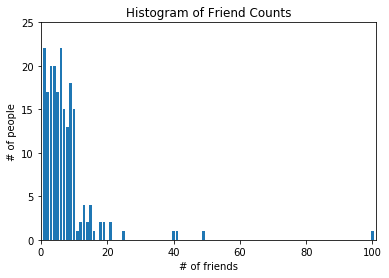

In [5]:
import matplotlib.pyplot as plt
from collections import Counter

def make_friend_counts_histogram(num_friends):
    friend_counts = Counter(num_friends)
    xs = range(101)
    ys = [friend_counts[x] for x in xs]
    plt.bar(xs, ys)
    plt.axis([0,101,0,25])
    plt.title("Histogram of Friend Counts")
    plt.xlabel("# of friends")
    plt.ylabel("# of people")
    plt.show()

num_friends = [100,49,41,40,25,21,21,19,19,18,18,16,15,15,15,15,14,14,13,13,13,13,12,12,11,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,8,8,8,8,8,8,8,8,8,8,8,8,8,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
make_friend_counts_histogram(num_friends)

In [6]:
# 가장 간단한 통계치
num_points = len(num_friends)
print(num_points)
# 최대/최소 - 함수 사용
largest_value = max(num_friends)
smallest_value = min(num_friends)
print(largest_value, smallest_value)

204
100 1


In [7]:
# 최대/최소 - 정렬list의 특정 위치값 
sorted_values = sorted(num_friends)
smallest_value = sorted_values[0]
second_smallest_value = sorted_values[1]
second_largest_value = sorted_values[-2]
print(smallest_value, second_smallest_value, second_largest_value)

1 1 49


### 5.1.1 중심 경향성(central tendency)
* 평균(mean)
$$\bar{x}=\sum_{i=1}^n\frac{x_i}{n}$$
* 중앙값(median)
* 분위(quantile/percentile)
* 최빈값


In [8]:
def mean(x): 
    return sum(x) / len(x)

mean(num_friends)

7.333333333333333

In [9]:
import numpy as np
np.mean(num_friends)

7.333333333333333

In [10]:
# 데이터의 중앙에 있는 값(홀수) 또는 중앙에 있는 두 값의 평균(짝수)
def median(v):
    """finds the 'middle-most' value of v"""
    n = len(v)
    sorted_v = sorted(v)
    midpoint = n // 2
    
    if n % 2 == 1:
        # if odd, return the middle value
        return sorted_v[midpoint]
    else:
        # if even, return the average of the middle values
        lo = midpoint - 1
        hi = midpoint
        return (sorted_v[lo] + sorted_v[hi]) / 2
    
median(num_friends)

6.0

In [11]:
np.median(num_friends)

6.0

In [19]:
def quantile(x, p):
    """returns the pth-percentile value in x"""
    p_index = int(p * len(x))
    return sorted(x)[p_index]

for i in range(0, 100, 25):
    print("%.2f Percentage value" % (i*0.01) , quantile(num_friends, i * 0.01))

0.00 Percentage value 1
0.25 Percentage value 3
0.50 Percentage value 6
0.75 Percentage value 9


In [20]:
np.percentile(num_friends, [i for i in range(0,100,25)])

array([ 1.,  3.,  6.,  9.])

In [23]:
def mode(x):
    """최빈값이 하나보다 많다면 list를 반환"""
    counts = Counter(x)
    max_count = max(counts.values())
    return [x_i for x_i, count in counts.items()
            if count == max_count]

mode(num_friends)

[6, 1]

### 5.1.2 산포도(dispersion)
* 범위(range)
* 분산(variance)
    * 하나의 변수가 변수의 평균에서 얼마나 멀리 떨어져 있는지 계산
    * 자료로부터 평균값의 차이에 대한 제곱 값의 평균 - 자료의 흩어진 정도
$$s^2=\sum_{i=1}^n\frac{(x_i-\bar{x})^2}{(n-1)}$$
* 표준편차(standard deviation)
    * 원래 단위와 맞춰주기 위해 분산에 제곱근을 적용한 값
$$s=\sqrt{\sum_{i=1}^n\frac{(x_i-\bar{x})^2}{(n-1)}}$$

> 식을 살펴보면 편차의 제곱의 평균을 계산하는 데 n 대신에 n-1로 나누는 것을 확일할 수 있다. 이는 편차의 제곱합을 n으로 나누면 bias 때문에 모분산에 대한 추정값이 실제 모분산보다 작게 계산되는 것을 보정해주기 위함이다. [wiki](https://en.wikipedia.org/wiki/Unbiased_estimation_of_standard_deviation)

In [24]:
# "range" already means something in Python, so we'll use a different name
def data_range(x):
    return max(x) - min(x)

data_range(num_friends)

99

In [12]:
def dot(v, w):
    """v_1 * w_1 + ... + v_n * w_n"""
    return sum(v_i * w_i for v_i, w_i in zip(v, w))

def sum_of_squares(v):
    """v_1 * v_1 + ... + v_n * v_n"""
    return dot(v, v)

# Mean - value
def de_mean(x):
    """x의 모든 데이터 포인트에서 평균을 뺌(평균을 0으로 만들기 위해)"""
    x_bar = mean(x)
    return [x_i - x_bar for x_i in x]

def variance(x):
    """x에 두 개 이상의 데이터 포인트가 존재한다고 가정"""
    n = len(x)
    deviations = de_mean(x)
    return sum_of_squares(deviations) / (n - 1)

variance(num_friends)

81.54351395730716

In [13]:
%timeit np.var(num_friends)
%timeit variance(num_friends) # 일반적인 분산 연산도 numpy가 빠름

40.4 µs ± 1.45 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
28.4 µs ± 479 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [34]:
import math
def standard_deviation(x):
    return math.sqrt(variance(x))

standard_deviation(num_friends)

9.03014473623248

In [35]:
np.std(num_friends, dtype=np.float64) 

9.0079848384460117

In [36]:
def interquartile_range(x):
    return quantile(x, 0.75) - quantile(x, 0.25)

interquartile_range(num_friends)

6

## 5.2 상관관계
* 공분산(covariance)
    * 두 변수가 각각의 평균에서 얼마나 멀리 떨어져 있는지에 대한 값
    * 각 변량간의 변화하는 양상을 나타내는 통계적 척도
    * 공분산의 단위는 입력변수의 단위들의 곱이므로 이해하기 쉽지 않음
    * 공분산의 크기를 가늠하기 어려움
$$\bar{x}, \bar{y}가 각각 변수 x, y의 평균이라고 할 때,\\
\begin{align}
C(x,y)=& \frac{1}{n}\sum_{i=1}^n(x_i - \bar{x})(y_i - \bar{y}) \\
=& \frac{1}{n}\sum_{i=1}^nx_iy_i-\bar{x}\bar{y}
\end{align}
$$
* 상관관계(correlation) - 상관 계수
    * 두 변수 사이의 상관관계의 정도를 나타내는 수치(계수)
    * 공분산에서 각각의 표준편차를 나눠 준 상관관계를 더 자주 살펴봄
    * 단위가 없으며 -1에서 1사이의 값을 갖음
$$ 0\leq|r_{xy}|\leq1 \\
r = \frac{C(x, y)}{\sqrt{V(x)V(y)}}
$$

In [38]:
daily_minutes = [1,68.77,51.25,52.08,38.36,44.54,57.13,51.4,41.42,31.22,34.76,54.01,38.79,47.59,49.1,27.66,41.03,36.73,48.65,28.12,46.62,35.57,32.98,35,26.07,23.77,39.73,40.57,31.65,31.21,36.32,20.45,21.93,26.02,27.34,23.49,46.94,30.5,33.8,24.23,21.4,27.94,32.24,40.57,25.07,19.42,22.39,18.42,46.96,23.72,26.41,26.97,36.76,40.32,35.02,29.47,30.2,31,38.11,38.18,36.31,21.03,30.86,36.07,28.66,29.08,37.28,15.28,24.17,22.31,30.17,25.53,19.85,35.37,44.6,17.23,13.47,26.33,35.02,32.09,24.81,19.33,28.77,24.26,31.98,25.73,24.86,16.28,34.51,15.23,39.72,40.8,26.06,35.76,34.76,16.13,44.04,18.03,19.65,32.62,35.59,39.43,14.18,35.24,40.13,41.82,35.45,36.07,43.67,24.61,20.9,21.9,18.79,27.61,27.21,26.61,29.77,20.59,27.53,13.82,33.2,25,33.1,36.65,18.63,14.87,22.2,36.81,25.53,24.62,26.25,18.21,28.08,19.42,29.79,32.8,35.99,28.32,27.79,35.88,29.06,36.28,14.1,36.63,37.49,26.9,18.58,38.48,24.48,18.95,33.55,14.24,29.04,32.51,25.63,22.22,19,32.73,15.16,13.9,27.2,32.01,29.27,33,13.74,20.42,27.32,18.23,35.35,28.48,9.08,24.62,20.12,35.26,19.92,31.02,16.49,12.16,30.7,31.22,34.65,13.13,27.51,33.2,31.57,14.1,33.42,17.44,10.12,24.42,9.82,23.39,30.93,15.03,21.67,31.09,33.29,22.61,26.89,23.48,8.38,27.81,32.35,23.84]

In [39]:
def covariance(x, y):
    n = len(x)
    return dot(de_mean(x), de_mean(y)) / (n - 1)

covariance(num_friends,daily_minutes)

22.425435139573064

In [40]:
np.cov(num_friends,daily_minutes)

array([[  81.54351396,   22.42543514],
       [  22.42543514,  100.78589895]])

In [42]:
def correlation(x, y):
    stdev_x = standard_deviation(x)
    stdev_y = standard_deviation(y)
    if stdev_x > 0 and stdev_y > 0:
        return covariance(x, y) / stdev_x / stdev_y
    else:
        return 0 # if no variation, correlation is zero
    
correlation(num_friends, daily_minutes)

0.24736957366478218

In [43]:
np.corrcoef(num_friends, daily_minutes)

array([[ 1.        ,  0.24736957],
       [ 0.24736957,  1.        ]])

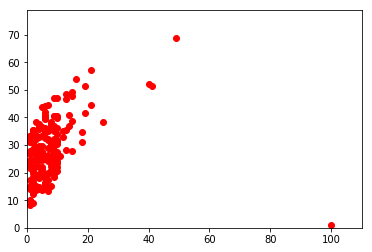

In [45]:
plt.plot(num_friends, daily_minutes, 'ro')
plt.axis([0,max(num_friends)+10,0,max(daily_minutes) +10 ])
plt.show()

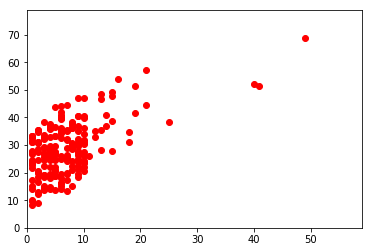

상관관계: 0.5736792115665573


In [48]:
# 이상치 데이터를 제거한 후의 상관 관계는
outlier = num_friends.index(100) # 이상치의 인덱스 (index of outlier)

num_friends_good = [x 
                    for i, x in enumerate(num_friends) 
                    if i != outlier]

daily_minutes_good = [x 
                      for i, x in enumerate(daily_minutes) 
                      if i != outlier]

plt.plot(num_friends_good, daily_minutes_good, 'ro')
plt.axis([0,max(num_friends_good)+10,0,max(daily_minutes_good) +10 ])
plt.show()
print("상관관계:", correlation(num_friends_good, daily_minutes_good))

## 5.3 심슨의 역설 (Simpson's paradox)
> 혼재변수(confounding variables)가 누락되어 상관관계가 잘못 계산되는 것

## 5.4 상관관계에 대한 추가적인 경고 사항 
* 상관관계가 0이라는 것은 두 변수 사이에 선형적인 관계가 없다는 것을 의미함
* 그러나, 다른 종류의 관계가 존재할 수도 있다.

## 5.5 상관관계와 인과관계 
> 상관관계는 인과관계를 의미하지 않는다. (correlation is not causation.)


## 5.6 더 공부해 보고 싶다면
* 회귀분석도 통계 기초의 area
* [SciPy](http://docs.scipy.org/doc/scipy/reference/stats.html), [pandas](http://pandas.pydata.org), [StatsModels](http://statsmodels.sourceforge.net) 모두 다양한 통계 관련 함수를 포함함
* 통계학은 중요하다(아니면 통계치를 내는 것이 중요한 것인가?)
* 무료 온라인 교과서
    * [OpenIntro Statistics](https://www.openintro.org/stat/textbook.php?stat_book=os)
    * [OpenStax Introductory Statistics](http://openstaxcollege.org/textbooks/introductory-statistics)